Before attempting to tweak Pymeasure for a specific experiment, one should know a little bit about Python, including "advanced topics" like fundametntals for OOP.

My **[notes](https://github.com/dashazhangdake/my_cs61a)** based on (the first half of) UCB CS61a S22 could be a reference for learning Python

## 0. list.append() vs. list = list1 + list2

In [1]:
l = []
l0 = [1] * 10
l1 = [2] * 10

l = l + l0 + l1
l

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [2]:
l.append(l0)
l

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

## 1. WTH is ```@ATTR```?
```@ATTR``` is Python decorator. 
**In Decorators, functions are taken as the argument into another function and then called inside the wrapper function.**

**For Example**
```python
    @ATTR
    def funct(...):
        ...
```
which is equivalent to:
```python 
    def funct(...):
        ...
    funct = ATTR(aFunc)
```

In [3]:
def trace1(f):
    def inside(x):
        print("->", x)
        res = f(x)
        print("<-", res)
        return res
    return inside
square = lambda x: x * x
trace1(square)(3)

-> 3
<- 9


9

In [4]:
@trace1
def square(x):
    return x * x
square(3)

-> 3
<- 9


9

### 1. a. Usage of ```@propery, @setter```
Set the attributes of a class using ```ClassInstance.attr = value```

**For example:** 

Using p1.x = value to change P.x

In [5]:
class P:
    def __init__(self, x):
        self.x = x
    @property
    def x(self):
        return self.__x
    @x.setter
    def x(self, x):
        if x < 0:
            self.__x = 0
        elif x > 1000:
            self.__x = 1000
        else:
            self.__x = x

In [6]:
p1 = P(180)
p1.x

180

In [7]:
p1.x = 10
p1.x

10

In [8]:
p1.x = -1
p1.x

0

In [9]:
p1.x = 10000
p1.x

1000

## 2. Liveplot usining Python3 and Matplotlib

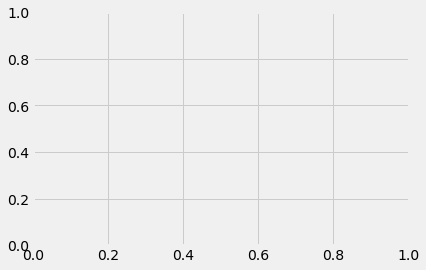

In [21]:
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

list_year=[]
list_age=[]
list_child=[]
lines = []

def animate(i):

    year,age,child = (s.strip() for s in lines[i].split(','))
    list_year.append(year)
    list_age.append(int(age))
    list_child.append(int(child))

    ax.clear()
    ax.plot(list_year,list_age)
    ax.plot(list_year,list_child)

with open(os.path.join(os.path.realpath('.'), 'plot_data.txt'),'r') as f:
    next(f) # skip header
    lines = f.readlines()

anim = animation.FuncAnimation(fig, animate, interval=1000, frames=len(lines)) 

# anim.save(os.path.join(os.path.realpath('.'), 'plot_data.txt'), writer='imagemagick8')